<a href="https://colab.research.google.com/github/denzzers/semenoff_da23/blob/main/%2309_Project_%D0%98%D0%B7%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BF%D0%BE%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9%20%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE%20%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B4%D1%83%D0%BA%D1%82%D0%BE%D0%B2%20%D0%BF%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сборный проект. Изучение поведения пользователей мобильного приложения продуктов питания

## Описание проекта

***
Наша команда участвует в стартапе, который занимается продажей продуктов питания. Нам необходимо изучить как ведут себя пользователи нашего приложения.

Изучим воронку продаж. Узнаем, как пользователи доходят до покупки. Сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах? На каких именно?

После этого исследуем результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясним, какой шрифт лучше.
***
**Последовательность действий**

Для того чтобы изучить поведени пользователей в приложении предлагаю выполнить следующий порядок действий:
- Шаг 1 - Загрузка данных и подготовка их к анализу:
  - изучим полученный файл;
  - выполним подготовку данных для последующего изучения.
- Шаг 2 - Изучение и проверка данных:
  - сколько пользователей;
  - сколько событий;
  - сколько в среднем приходится событий на пользователя;
  - какой период времени в нашем распоряжении;
  - много ли пользователей и событий потеряли, отбросив старые данные;
  - проверим наличие пользователей всех трех групп;
- Шаг 3 - Изучение воронки событий:
  - изучим события и частоту их повторения;
  - изучим сколько пользователей совершали каждые события;
  - посчием долю пользователей, хоть раз совершавших событие;
  - постараемся выстроить порядок событий;
  - по воронке событий определим долю пользователей, переходящих на следущий шаг;
  - на каком из шагов теряем больше всего пользователей;
  - определим долю пользователей, проходящих "от" и "до".
- Шаг 4 - Изучение результатов эксперимента:
  - количество пользователей каждой группы;
  - проверим, находят ли статистические критерии разницу между выборками 246 и 247 (группы для А/А-эксперимента);
  - изучим самое популярное событие (число пользователей, выполнивших в каждой группе, долю пользователей совершивших данное событие и т.д.);
  - аналогично изучим группу В, для которой был изменён шрифт;
  - определим уровень значимости для проверки статических гипотез выше;
  - посчитаем количество сделанных гипотез;
  - определим какой уровень значимости стоит применить.
- Шаг 5 - Общий вывод.
***
**Описание данных**
У нас в распоряжении имеются данные, которые размещены в следующем файле `logs_exp.csv`. Данный файл представляет собой лог, каждая запись которого — это действие пользователя, или событие со следующим атрибутивным составом:
- `EventName` — название события;
- `DeviceIDHash` — уникальный идентификатор пользователя;
- `EventTimestamp` — время события;
- `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная.

In [1]:
# выполним загрузку необходимых библиотек для выполнения работы
import os
from scipy import stats as st
import pandas as pd
import datetime as dt
import numpy as np
import math as mth
import scipy.stats as stats
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from google.colab import drive
drive.mount('/content/drive')

#увеличем максимальное количество, отображающихся колонок
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

#увеличим шириниу колонок
pd.set_option('display.max_colwidth', 0)

Mounted at /content/drive


## Шаг 1. Загрузка данных и подготовка их к анализу

Выполним загрузка таблицы `logs_exp.csv` и выполним предобработку данных для последующей работы

In [2]:
# назначим переменную для исходных данных
try:
    logs_data = pd.read_csv('/datasets/logs_exp.csv', sep = '\t', engine = 'python')
except:
    logs_data = pd.read_csv('/content/drive/MyDrive/datasets_YaP/logs_exp.csv', sep = '\t', engine = 'python')

In [3]:
# выведим таблицу
logs_data

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [4]:
# выведим информацию по таблице
logs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


По полученной информации по таблице наблюдаются следующие проблемы:
- необходимо привести колонки к питообразному виду (например, 'event_name');
- колонка 'EventTimestamp' необходимо привести к типу datetime.

In [5]:
# приведем колонки к питообразному виду
logs_data.columns = ['event', 'users_id', 'date_event', 'group_test']

In [6]:
# приведем колонку 'date_event' к типу datetime
logs_data['date_event'] = pd.to_datetime(logs_data['date_event'], unit='s')

В таблицу для последующего анализа необходимо добавить отдельную колонку дат, назовем ее 'date'.

In [7]:
# добавим колонку 'date'
logs_data['date'] = logs_data['date_event'].dt.strftime('%Y-%m-%d')
logs_data['date'] = pd.to_datetime(logs_data['date'])

In [8]:
# выведим вновь информацию о таблице для проверки полученных преобразований
logs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       244126 non-null  object        
 1   users_id    244126 non-null  int64         
 2   date_event  244126 non-null  datetime64[ns]
 3   group_test  244126 non-null  int64         
 4   date        244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


In [9]:
# выведим head и tail таблицы
logs_data

,event,users_id,date_event,group_test,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


<b>Подитог:</b>
- наименование колонок приведены к правильному виду;
- колонка 'date_event' имеет правильный тип;
- добавлена новая колонка с датами 'date'.

Для уверенности, что у нас таблица готова к анализу, необходимо проверить наличие дубликатов в предоставленных данных

In [10]:
# проверим наличие дубликатов в таблице, объявим переменную
duplicate_rows = logs_data[logs_data.duplicated()]

In [11]:
# выведим дубликаты и сумму дубликатов в таблице
duplicate_rows

,event,users_id,date_event,group_test,date
453,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248,2019-07-30
2350,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248,2019-07-31
3573,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248,2019-08-01
4076,MainScreenAppear,3761373764179762633,2019-08-01 03:47:46,247,2019-08-01
4803,MainScreenAppear,2835328739789306622,2019-08-01 04:44:01,248,2019-08-01
...,...,...,...,...,...
242329,MainScreenAppear,8870358373313968633,2019-08-07 19:26:44,247,2019-08-07
242332,PaymentScreenSuccessful,4718002964983105693,2019-08-07 19:26:45,247,2019-08-07
242360,PaymentScreenSuccessful,2382591782303281935,2019-08-07 19:27:29,246,2019-08-07
242362,CartScreenAppear,2382591782303281935,2019-08-07 19:27:29,246,2019-08-07


В таблице присутствует 413 строк дубликатов - это составляет 0,17% от общего количества записей в таблице. Предлагается данные дубликаты удалить.

In [12]:
# удалим дубликаты из таблицы с данными
logs_data = logs_data.drop_duplicates().reset_index(drop=True)

In [13]:
# выведим повторно информацию о таблице
logs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243713 entries, 0 to 243712
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event       243713 non-null  object        
 1   users_id    243713 non-null  int64         
 2   date_event  243713 non-null  datetime64[ns]
 3   group_test  243713 non-null  int64         
 4   date        243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


В таблице оталось 243713 записей, дубликаты удалены.

In [14]:
# выведим первые пять строк таблицы
logs_data.head()

,event,users_id,date_event,group_test,date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25


<b>Итог:</b>
- наименование колонок приведены к правильному виду;
- колонка 'date_event' имеет правильный тип datetime;
- добавлена новая колонка с датами 'date';
- устранены дубликаты из таблицы.

Считаю, что таблица готова к последующему проведению тестов и анализу. Перейдем к следующему шагу по изучению и проверке данных.

## Шаг 2. Изучение и проверка данных

***
**Вопросы, на которые необходимы получить ответ:**
- Сколько всего событий в логе?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Данными за какой период вы располагаете? Найдите максимальную и минимальную дату. Постройте гистограмму по дате и времени. Можно ли быть уверенным, что у вас одинаково полные данные за весь период? Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определите, с какого момента данные полные и отбросьте более старые. Данными за какой период времени вы располагаете на самом деле?
- Много ли событий и пользователей вы потеряли, отбросив старые данные?
- Проверьте, что у вас есть пользователи из всех трёх экспериментальных групп.
***

### Количество событий

In [15]:
# выведем количество уникальных событий
print('Кол-во уникальных событий:', logs_data['event'].nunique())

Кол-во уникальных событий: 5


In [16]:
# выведем наименование событий
print('В таблице представлены следующие события:', logs_data['event'].unique())

В таблице представлены следующие события: ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


In [17]:
# посчитаем количество по каждому совершенному событию
logs_data['event'].value_counts()

MainScreenAppear           119101
OffersScreenAppear         46808 
CartScreenAppear           42668 
PaymentScreenSuccessful    34118 
Tutorial                   1018  
Name: event, dtype: int64

**Итог:**
В представленной таблице представлено 5 уникальных событий:
- `MainScreenAppear` - количество совершенных событий `119101`;
- `OffersScreenAppear` - количество совершенных событий `46808`;
- `CartScreenAppear` - количество совершенных событий `42668`;
- `PaymentScreenSuccessful` - количество совершенных событий `34118`;
- `MainScreenAppear` - количество совершенных событий `1018`.

### Количество пользователей

In [18]:
# посчитаем количество уникальных пользователей в таблице
print('Кол-во уникальных пользователей:', logs_data['users_id'].nunique())

Кол-во уникальных пользователей: 7551


Предалагаю проссмотреть количество уникальных пользователей по предоставленным группам в таблице, перед этим для последующего анализа выполним переименование групп А на группы А1 и А2, группу В оставить без переименования.

In [19]:
# объявим функцию для переименования групп
def name_group(group_test):
    if group_test==246:
        return 'A1'
    elif group_test==247:
        return 'A2'
    elif group_test==248:
        return 'B'
    else:
        return 'Неопределено'

In [20]:
# выполним переименование групп
logs_data['group_test'] = logs_data['group_test'].apply(name_group)

In [21]:
# выведем количество уникальных пользователей по группам теста
for gr in logs_data['group_test'].unique():
    un_user = logs_data[logs_data['group_test'] == gr]['users_id'].nunique()
    print(f'Группа {gr}. Кол-во уникальных пользователей: {un_user}.')

Группа A1. Кол-во уникальных пользователей: 2489.
Группа B. Кол-во уникальных пользователей: 2542.
Группа A2. Кол-во уникальных пользователей: 2520.


**Итог:**
- в представленной таблице имеется `7551` уникальных пользователей;
- выполнили переименование групп для последующего удобства анализа, теперь в таблице присутствует наименование трех групп А1, А2, В;
- посчитали кол-во уникальных пользователей по группам:
    - Группа А1 - 2489;
    - Группа А2 - 2520;
    - Группа В - 2542.

Если выполнить допольнительно суммирование уникальных пользователей по группам отдельно (2489 + 2520 + 2542), то сумма 7551 уникальных пользователей, что равно общему подсчету уникальных пользователей по таблице, следовательно можно сделать вывод, что пользователей, присутствующих в двух группах одновременно, нет. Продолжаем анализ.

### Среднее количество событий на пользователя

In [22]:
# посмотрим характерные значения распределения количества событий на пользователя
logs_data.groupby('users_id')['event'].count().describe()

count    7551.000000
mean     32.275593  
std      65.154219  
min      1.000000   
25%      9.000000   
50%      20.000000  
75%      37.000000  
max      2307.000000
Name: event, dtype: float64

По полученным данным наблюдаем, что стандартное отклонение больше среднего примерно в 2 раза. Необходимо построить гистограмму, чтобы посмотреть есть ли аномальные выбросы.

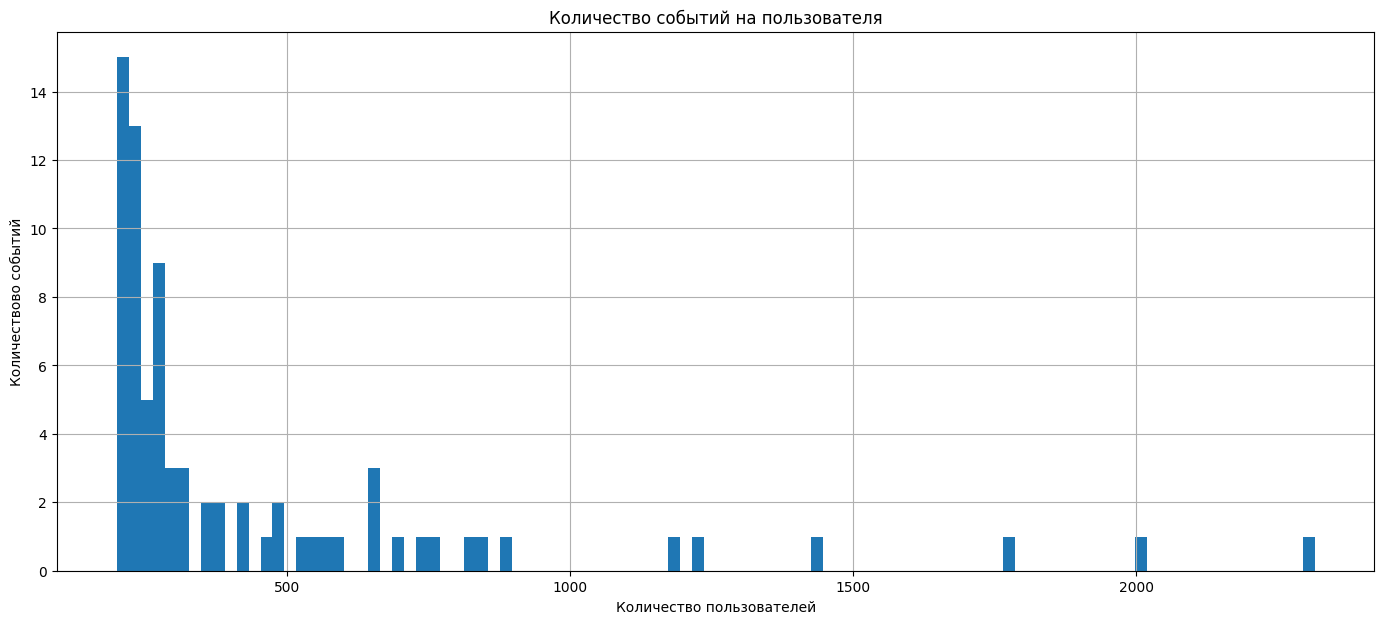

In [23]:
# построим график
plt.figure(figsize=(17,7))
plt.hist(logs_data.groupby('users_id')['event'].count(), bins=100, range=(200,2315))
plt.grid()
plt.xlabel('Количество пользователей')
plt.ylabel('Количествово событий')
plt.title('Количество событий на пользователя');

По гистограмме наблюдаются выбросы 2000, что может исказить результаты расчетов среднего значения количества событий на пользователя, следовательно лучше использовать расчет медианы.

In [24]:
# посчитаем среднее количество событий на пользователя
print('Среднеее кол-во событий на пользователя:', logs_data.groupby('users_id')['event'].count().median())

Среднеее кол-во событий на пользователя: 20.0


**Итог:**
По полученным результатам можно сделать вывод, что в среднем на одном пользователя приходится `20 событий`.

### Изучение данных по предоставленному периоду

In [25]:
# получим минимальное и максимальное значения предоставленных дат
print("Минимальная дата:", logs_data['date_event'].min())
print("Максимальная дата:", logs_data['date_event'].max())

Минимальная дата: 2019-07-25 04:43:36
Максимальная дата: 2019-08-07 21:15:17


В нашем логе предоставлен период с 25 июля 2019 по 7 августа 2019 года, то есть 13 дней (меньше 2х недель).

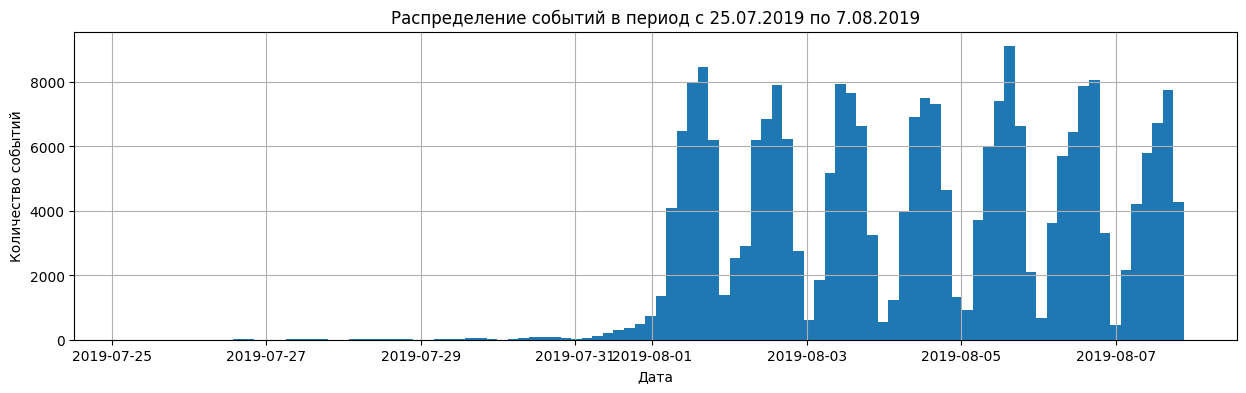

In [26]:
# изучим распределение событий по предоставленному периоду
plt.figure(figsize=(15,4))
plt.hist(logs_data['date_event'], bins=100)
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий в период с 25.07.2019 по 7.08.2019');

На гистрограмме наблюдаем следующее распределение событий:
- основной массив событий начинается с 31 июля 2019 года, следовательно, можно сделать подитог, что в реалии в нашем распоряжении период с 1 августа по 7 августа, то есть 7 дней.
- необходимо посмотреть распределение событий по периоду, когда происходит наибольшая активность.

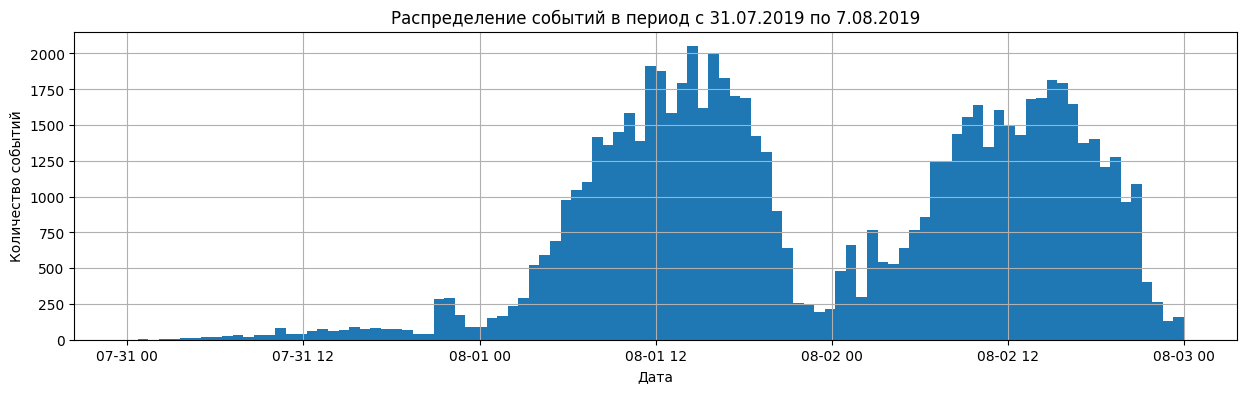

In [27]:
# изучим распределение событий по периоду с 31.07.2019 по 07.08.2019
plt.figure(figsize=(15,4))
plt.hist(logs_data['date_event'], bins=100, range=('2019-07-31','2019-08-03'))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий в период с 31.07.2019 по 7.08.2019');

Снова по гистограмме наблюдаем, что 31 июля еще активность не настолько набрала свои обороты, предлагаю умешить период  с 31 июля 21:00.

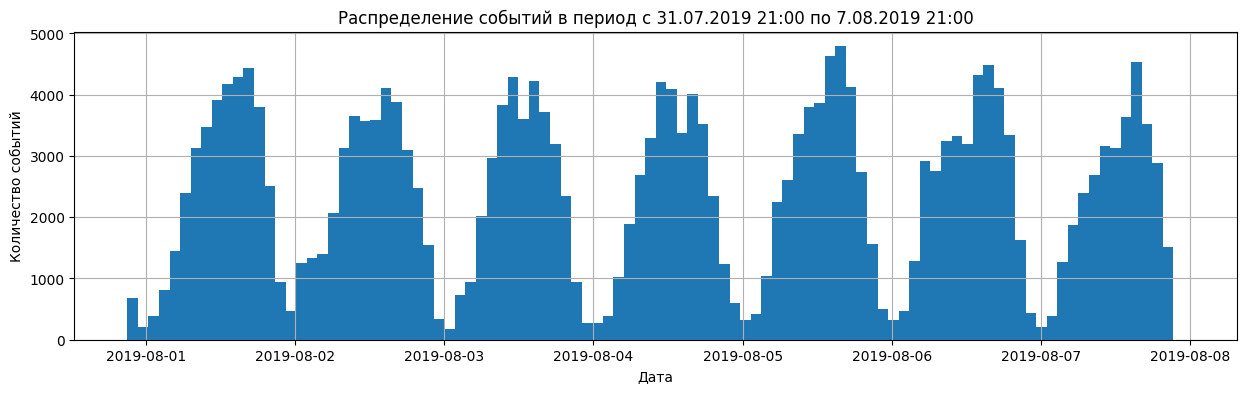

In [28]:
# изучим распределение событий по периоду с 31.07.2019 21:00 по 07.08.2019 21:00
plt.figure(figsize=(15,4))
plt.hist(logs_data['date_event'], bins=100, range=('2019-07-31 21:00:00','2019-08-7 23:00:00'))
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Количество событий')
plt.title('Распределение событий в период с 31.07.2019 21:00 по 7.08.2019 21:00');

Теперь с уверенностью можно сказать, что для последующего анализи необходимо анализировать таблицу в период с 31 июля 21:00 до 07 августа 23:00 - 7 дней.

In [29]:
# отбросим из таблицы период с 25 июля 2019 по 31 июля 2019 21:00
logs_data_analysis = logs_data.loc[logs_data['date_event'] > '2019-07-31 21:00:00'].reset_index(drop=True)

In [30]:
# выведем новую таблицу
logs_data_analysis.sort_values(by='date_event')

,event,users_id,date_event,group_test,date
0,MainScreenAppear,7701922487875823903,2019-07-31 21:00:57,A2,2019-07-31
1,MainScreenAppear,2539077412200498909,2019-07-31 21:01:45,A2,2019-07-31
2,OffersScreenAppear,3286987355161301427,2019-07-31 21:02:21,B,2019-07-31
3,OffersScreenAppear,3187166762535343300,2019-07-31 21:02:23,A2,2019-07-31
4,MainScreenAppear,1118952406011435924,2019-07-31 21:03:25,B,2019-07-31
...,...,...,...,...,...
241719,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,A2,2019-08-07
241720,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,A1,2019-08-07
241721,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,A1,2019-08-07
241722,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,A1,2019-08-07


**Итог:**
- Актуальный период для последующего анализа с `31 июля 2019 21:00` по `07 августа 2019 21:00`.
- Сформирована новая таблица для последующего анализа.

### Процент отрезанных данных

In [31]:
# посчитаем процент отрезанных пользователей
print('Количество потерянных пользователей -', logs_data['users_id'].nunique() - logs_data_analysis['users_id'].nunique())

Количество потерянных пользователей - 13


In [32]:
# посчитаем процент отрезанных пользователей
print('Количество потерянных пользователей -', \
      (1 - (logs_data_analysis['users_id'].nunique() / logs_data['users_id'].nunique())) * 100)

Количество потерянных пользователей - 0.17216262746656552


In [33]:
# посчитаем процент отрезанных событий
print('Количество потерянных событий -', \
      (1 - (logs_data_analysis['event'].count() / logs_data['event'].count())) * 100)

Количество потерянных событий - 0.81612388342025


**Итог:**
По результатам отброса данных за период с `25 июля 2019` по `31 июля 2019 21:00` мы потеряли:
- `0.17%` пользователей - данный процент считаем допустимым;
- `0.82%` событий - данный процент считаем допустимым.

### Проверка пользователей в группах

Ранее  мы переименовали для удобства анализа название групп и посчитали количество пользователей в каждой из групп:
- Группа А1 - 2489;
- Группа А2 - 2520;
- Группа В - 2542.

In [34]:
# выведим количество уникальных пользователей по группам теста
for gr in logs_data_analysis['group_test'].unique():
    un_user = logs_data_analysis[logs_data_analysis['group_test'] == gr]['users_id'].nunique()
    print(f'Группа {gr}. Кол-во уникальных пользователей: {un_user}.')

Группа A2. Кол-во уникальных пользователей: 2517.
Группа B. Кол-во уникальных пользователей: 2537.
Группа A1. Кол-во уникальных пользователей: 2484.


Необходимо выполнить проверку имеются ли пользователи, которые находятся в двух/трех группах одновременно.

In [35]:
# определим переменные по группам
group_a1 = logs_data_analysis[logs_data_analysis['group_test'] == 'A1']['users_id']
group_a2 = logs_data_analysis[logs_data_analysis['group_test'] == 'A2']['users_id']
group_b = logs_data_analysis[logs_data_analysis['group_test'] == 'B']['users_id']

In [36]:
# cформируем таблицу с двумя группами по visitor_id
orders_groups_a1a2b = logs_data_analysis.query('users_id in @group_a1 and users_id in @group_a2 and users_id in @group_b')

In [37]:
# выведим всех уникальных пользователей
orders_groups_a1a2b['users_id'].unique()

array([], dtype=int64)

In [38]:
print('Кол-во пользоватлей в группе А1, А2 и В:', orders_groups_a1a2b['users_id'].nunique())
print('Всего пользователей:', logs_data_analysis['users_id'].nunique())
print('Процент пользователей групп от общего числа:', round(orders_groups_a1a2b['users_id'].nunique() / logs_data_analysis['users_id'].nunique() * 100, 1), '%')

Кол-во пользоватлей в группе А1, А2 и В: 0
Всего пользователей: 7538
Процент пользователей групп от общего числа: 0.0 %


<b>Итог:</b>

В каждой группе с учетом выполненных отбросов у нас находится примерно по `2500` уникальных пользователей. Также выполняли проверку на повторение пользователей в нескольких группах одновременно, которая показала, что таких пользователей нет и можно смело начинать анализ.

**Общий вывод по изучению и проверки данных:**

В результате проведенных исследований мы узнали, что нам был предоставлены данные в период с `25 июля` по `7 августа 2019 года`, но при последующем анализе мы выяснияснили, что с `25 июля` по `31 июля` количество событий незначительны чем с `1 августа` по `7 августа`. Следовательно, данные за июль нами были отброшены из представленного датасета.

В результате проработки временного периода и отброса данных мы потеряли `0,17%` пользователей и `0,82%` событий, данный процент является допустимым и не повлияет на наш последующий анализ.

Мы посчитали количество уникальных пользователей в каждой группе и получили следующие результы:
- Группа А1 - `2484`;
- Группа А2 - `2517`;
- Группа В - `2537`.

Также просмотрели повторение пользователей сразу в нескольких группах, таких пользователей мы не наблюдаем.
В среднем на каждого пользователя приходится по `20` событий.

## Шаг 3. Изучение воронки событий

***
**Вопросы, на которые необходимы получить ответ:**
- Посмотрите, какие события есть в логах, как часто они встречаются. Отсортируйте события по частоте.
- Посчитайте, сколько пользователей совершали каждое из этих событий. Отсортируйте события по числу пользователей. Посчитайте долю пользователей, которые хоть раз совершали событие.
- Предположите, в каком порядке происходят события. Все ли они выстраиваются в последовательную цепочку? Их не нужно учитывать при расчёте воронки.
- По воронке событий посчитайте, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитайте отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B.
- На каком шаге теряете больше всего пользователей?
- Какая доля пользователей доходит от первого события до оплаты?
***

### Изучение событий

In [39]:
# выведем уникальные события из лога и их частоту повтора в порядке убывания
logs_data_analysis['event'].value_counts()

MainScreenAppear           117889
OffersScreenAppear         46531 
CartScreenAppear           42343 
PaymentScreenSuccessful    33951 
Tutorial                   1010  
Name: event, dtype: int64

В логе у нас пять основных событий со следующим числом повторений:
- Отображение главного экрана (MainScreenAppear) - `119101` раз;
- Отображение экрана предложений (OffersScreenAppear) - `46808` раз;
- Отображение экрана корзины (CartScreenAppear) - `42668` раз;
- Экран "Платеж успешно прошел" (PaymentScreenSuccessful) - `34118` раз;
- Экран "Руководство пользователя" (Tutorial) - `1018` раз.

Давайте посмотрим процент повторения каждого события на диаграмме.

In [40]:
percent_event = logs_data_analysis.pivot_table(index='event', aggfunc='count')

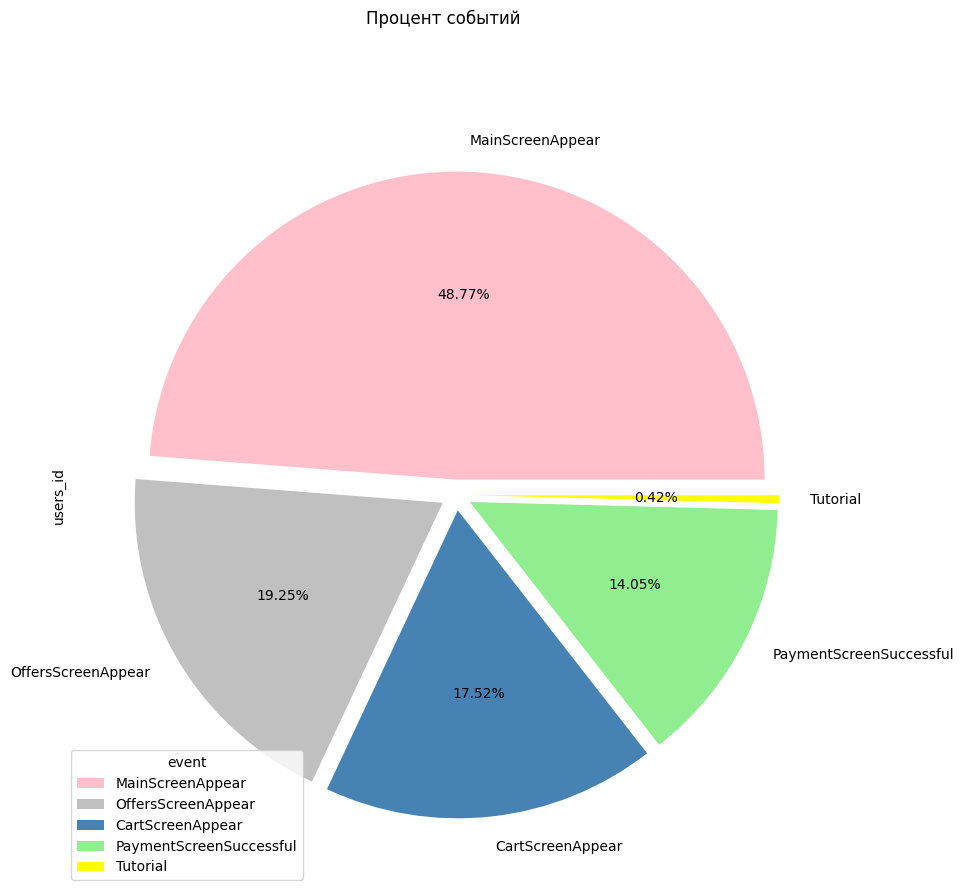

In [41]:
colors = ['pink', 'silver', 'steelblue', 'lightgreen', 'yellow']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

(
    percent_event
        .sort_values(by='users_id', ascending=False).head(5)
        .plot(kind='pie', y='users_id', autopct='%0.2f%%', colors=colors, explode=explode, subplots=True, figsize=(10, 10), title='Процент событий')
)

plt.legend(title='event', loc=(0, 0));

**Итог:**

Наибольше частота повторений приходится на событие `"Отображение главного экрана"` (MainScreenAppear) - оно повторяется `119101` раз, что составляет `48,77%` от общего количества событий в датасет. Наименьшее количество повторений приходится на событие `"Экран "Руководство пользователя"` (Tutorial) - оно повторяется `1018` раз, что составляет примерно `0,42%`. По данному событию надо будет провести дополнительный анализ, чтобы понять насколько много информации они нам могут дать. Оставшийся процент делится между тремя событиями:
- `Отображение экрана предложений` (OffersScreenAppear) - `46808` раз (19,25%);
- `Отображение экрана корзины` (CartScreenAppear) - `42668` раз (17,52%);
- `Экран "Платже успешно прошел"` (PaymentScreenSuccessful) - `34118` раз (14,05%);

### Изучение пользователей и событий

In [42]:
# изучим сколько пользователей приходится на каждое из имеющихся событий
# соберем сводную таблицу
count_ev_for_user = logs_data_analysis.pivot_table(index = 'event', values = 'users_id', aggfunc = 'nunique')
count_ev_for_user = count_ev_for_user.rename(columns={'users_id': 'count'})
count_ev_for_user = count_ev_for_user.reset_index()
count_ev_for_user = count_ev_for_user.sort_values(by='count', ascending=False)
count_ev_for_user

,event,count
1,MainScreenAppear,7423
2,OffersScreenAppear,4597
0,CartScreenAppear,3736
3,PaymentScreenSuccessful,3540
4,Tutorial,843


In [43]:
# добавим в сводную таблицу колонку с долям пользователей, хотя бы раз совершивших событие
count_ev_for_user['percent'] = round((count_ev_for_user['count'] / logs_data_analysis['users_id'].nunique() * 100), 2)

In [44]:
# выведем таблицу
count_ev_for_user.sort_values(by='count', ascending=False)

,event,count,percent
1,MainScreenAppear,7423,98.47
2,OffersScreenAppear,4597,60.98
0,CartScreenAppear,3736,49.56
3,PaymentScreenSuccessful,3540,46.96
4,Tutorial,843,11.18


По полученной таблице мы наблюдаем следующую картину:
- Отображение главного экрана (MainScreenAppear) - самое популярное событие по количеству совершенных пользователей, количествую и доле пользователей;
- Отображение экрана предложений (OffersScreenAppear) - событие #2;
- Отображение экрана корзины (CartScreenAppear) - событие #3;
- Экран "Платже успешно прошел" (PaymentScreenSuccessful) - событие #4;
- Экран "Руководство пользователя" (Tutorial) - событие #5.

Воронка начинает прорисовываться, предлагаю визуально представить данную воронку с разбиением по группам.

In [45]:
# сформируем сводную таблицу по событиям и разбитием по группам
users_group = logs_data_analysis.pivot_table(index = ['event', 'group_test'], \
                                             values = 'users_id', \
                                             aggfunc = {'event' : 'count',
                                                        'users_id' : 'nunique'})
users_group = users_group.rename(columns={'event': 'count_event', 'users_id' : 'count_users'})
users_group = users_group.reset_index()

In [46]:
# определим уникальных пользователей по группам
group_a1 = logs_data_analysis[logs_data_analysis['group_test']=='A1']['users_id'].nunique()
group_a2 = logs_data_analysis[logs_data_analysis['group_test']=='A2']['users_id'].nunique()
group_b = logs_data_analysis[logs_data_analysis['group_test']=='B']['users_id'].nunique()

In [47]:
# определим функцию для расчета долей
def users_part_group(row):
    if row['group_test']=='A1':
        return (row['count_users'] / group_a1 * 100)
    elif row['group_test']=='A2':
        return (row['count_users'] / group_a2 * 100)
    elif row['group_test']=='B':
        return (row['count_users'] / group_b * 100)

In [48]:
# добавим новуб колонку с с долями пользователей
users_group['per_users'] = users_group.apply(users_part_group, axis=1)
users_group['per_users']= users_group['per_users'].round(1)

In [49]:
# выведем таблицу
users_group = users_group.sort_values(by=['group_test','count_users'], ascending=False)
users_group

,event,group_test,count_event,count_users,per_users
5,MainScreenAppear,B,40740,2494,98.3
8,OffersScreenAppear,B,16465,1531,60.3
2,CartScreenAppear,B,15207,1231,48.5
11,PaymentScreenSuccessful,B,12110,1182,46.6
14,Tutorial,B,353,281,11.1
4,MainScreenAppear,A2,39294,2479,98.5
7,OffersScreenAppear,A2,15237,1524,60.5
1,CartScreenAppear,A2,12439,1239,49.2
10,PaymentScreenSuccessful,A2,9983,1158,46.0
13,Tutorial,A2,340,284,11.3


In [50]:
order = count_ev_for_user['event']

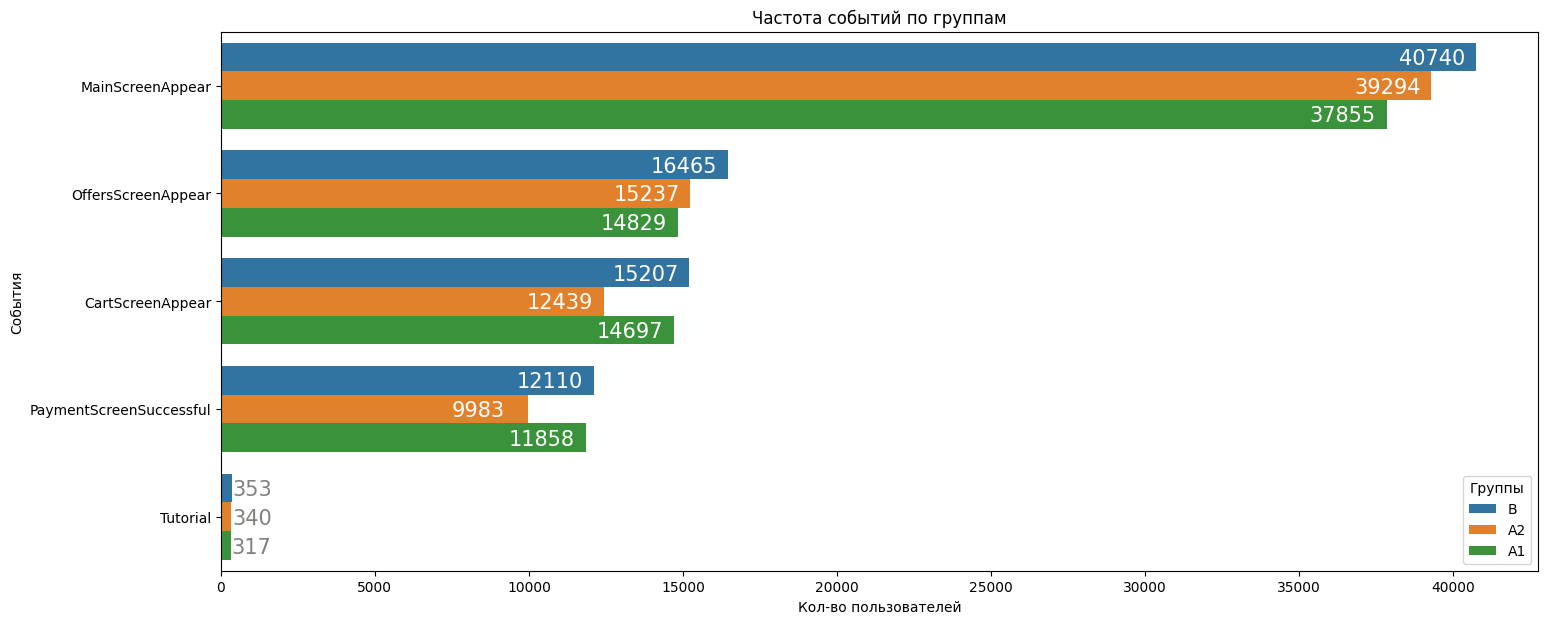

In [51]:
# построим график
plt.figure(figsize=(17, 7))
ax = sns.barplot(y='event', x='count_event', order=order, hue='group_test', data=users_group)
ax.set_xlabel('Кол-во пользователей')
ax.set_ylabel('События')
for i in ax.patches:
    if i.get_width() > 9000:
        ax.text(i.get_width()-2500, i.get_y()+0.2,
                str(int(i.get_width())), fontsize=15, color='white')
    else:
        ax.text(i.get_width()+30, i.get_y()+0.2,
                str(int(i.get_width())), fontsize=15, color='grey')
ax.set_title('Частота событий по группам')
ax.legend(title = 'Группы');

**Подитог:**
По полученному графику мы наблюдаем тужее картину, что и по таблице:
- Отображение главного экрана (MainScreenAppear) - самое популярное событие по количеству совершенных пользователей, количествую и доле пользователей;
- Отображение экрана предложений (OffersScreenAppear) - событие #2;
- Отображение экрана корзины (CartScreenAppear) - событие #3;
- Экран "Платже успешно прошел" (PaymentScreenSuccessful) - событие #4;
- Экран "Руководство пользователя" (Tutorial) - событие #5.

Построим график по долям пользователей, которые совершили каждое пользователи.

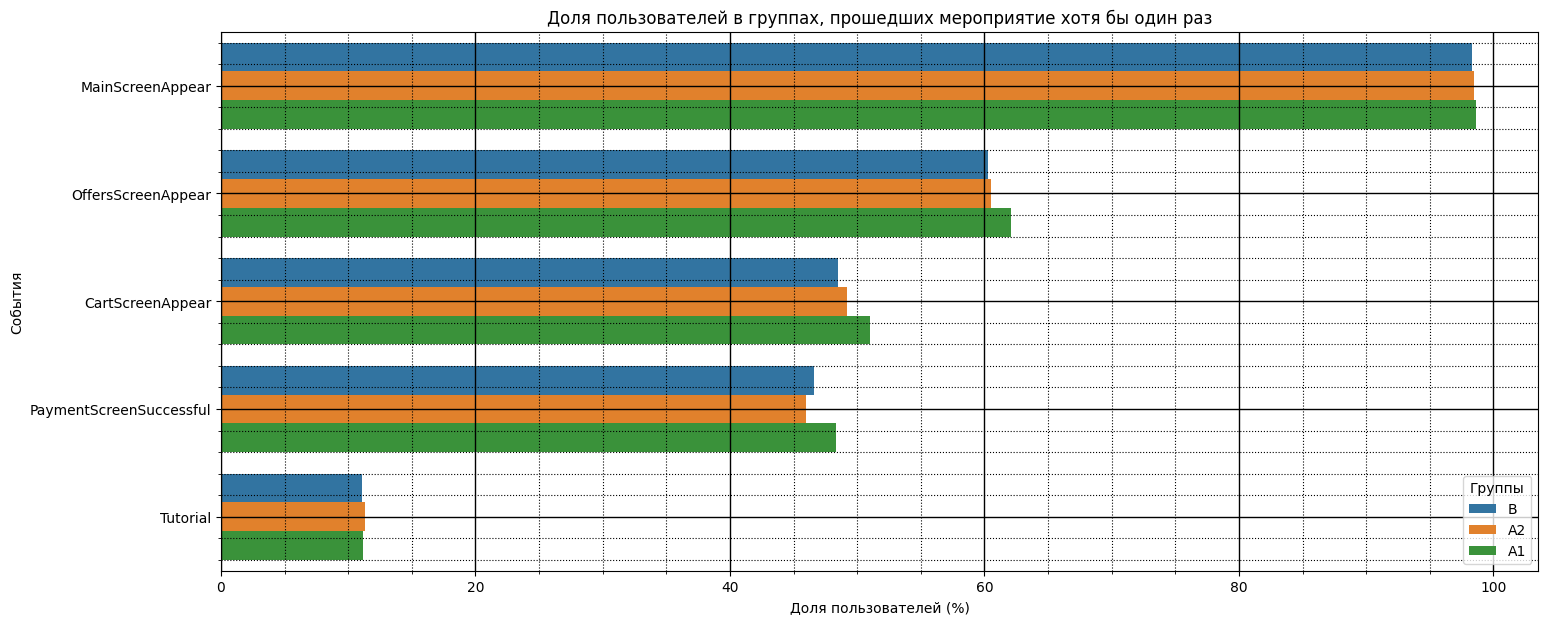

In [52]:
# построим график воронки
plt.figure(figsize=(17, 7))
ax = sns.barplot(y='event', x='per_users', order=order, hue='group_test', data=users_group)
ax.minorticks_on()
ax.grid(which='major',
        color = 'k',
        linewidth = 1)
ax.grid(which='minor',
        color = 'k',
        linestyle = ':')
ax.set_xlabel('Доля пользователей (%)')
ax.set_ylabel('События')
ax.set_title('Доля пользователей в группах, прошедших мероприятие хотя бы один раз')
ax.legend(title = 'Группы');

In [53]:
users_group

,event,group_test,count_event,count_users,per_users
5,MainScreenAppear,B,40740,2494,98.3
8,OffersScreenAppear,B,16465,1531,60.3
2,CartScreenAppear,B,15207,1231,48.5
11,PaymentScreenSuccessful,B,12110,1182,46.6
14,Tutorial,B,353,281,11.1
4,MainScreenAppear,A2,39294,2479,98.5
7,OffersScreenAppear,A2,15237,1524,60.5
1,CartScreenAppear,A2,12439,1239,49.2
10,PaymentScreenSuccessful,A2,9983,1158,46.0
13,Tutorial,A2,340,284,11.3


**Итог:**
- `98,5%` зашли на сайт - `7423` - событие `MainScreenAppear`;
- `61%` открыли страницу с каталогом товаров - `4597` - событие `OffersScreenAppear`;
- `49,6%` открыли корзину - `3736` - событие `CartScreenAppear`;
- `47%` попадали на страницу об успешной оплате - `3540` - событие `PaymentScreenSuccessful`;
- `11,2%` открывали руководство пользователя - `843` - событие `Tutorial`.

### Изучение порядка событий в воронке

Порядок событий в воронке мы просмотрели в пункте 3.2.

В данном пункте предлагаю вынести несколько предположений, как события происходят в воронке.
Ранее мы наблюдали, что событие `Tutorial` выполняется малым количеством пользователей и, впринципе, происходит редко, то данным событие можно, НО необязательно выполнять, чтобы использовать мобильное приложение.

Придерживаясь данной логики можем предположить два варианта развития событий:
- **Вариант №1**
    - Пользователь открывает сайт/приложение и попадает на стартовую страницу -> Переходит в каталог товаров и выполняет поиск необходимых ему -> Найденные товары добавляет к себе в корзину и переходит в нее -> Выполняет оплату по выбранным товарам и перед ним появляется окно об успешной оплате.

- **Вариант №2** (данный вариант мы можем предположить, если бы посещение стартовой страницы сайта/приложения)
    - Пользователь в каталоге товаров выполныет поиск необходимых ему (в случае если пользователь перешел разу в каталог по найденному/полученному линку) -> Товар на который перешел по линку, а также найденные товары после добавляет к себе в корзину и переходит к ней -> Выполняет оплату по выбранным товарам и перед ним появляется окно об успешной оплате.
        
Далее предлагается анализировать **Вариант №1**, так как на данный момент по полученным данным в логе он является самым предпочтительным.

### Изучение переходом между событиями в воронке

Так как мы ранее предположили, что событие `Tutorial` не даст нам необходимой информации, мы отсечем в таблице данное событие и продолжим анализ.

In [54]:
# уберем из таблицы событие 'Tutorial'
users_group = users_group.query("event != 'Tutorial'")

In [55]:
# сформируем таблицы по группам
funnel_group_a1 = users_group.query("group_test == 'A1'")
funnel_group_a1 = funnel_group_a1.reset_index()
funnel_group_a2 = users_group.query("group_test == 'A2'").reset_index()
funnel_group_b = users_group.query("group_test == 'B'").reset_index()
funnel_group_b

,index,event,group_test,count_event,count_users,per_users
0,5,MainScreenAppear,B,40740,2494,98.3
1,8,OffersScreenAppear,B,16465,1531,60.3
2,2,CartScreenAppear,B,15207,1231,48.5
3,11,PaymentScreenSuccessful,B,12110,1182,46.6


In [56]:
# построим воронку по пользователям на каждое событие во всех группах
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Группа A1',
    y = funnel_group_a1['event'],
    x = funnel_group_a1['count_users'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Группа A2',
    orientation = "h",
    y = funnel_group_a2['event'],
    x = funnel_group_a2['count_users'],
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Группа B',
    orientation = "h",
    y = funnel_group_b['event'],
    x = funnel_group_b['count_users'],
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.update_layout(
    title_text = 'Воронка по пользователям на каждое событие (разбивка по группам)',
    title_font_size = 16,
)

fig.show();

По полученной воронке мы наблюдаем следующую картину:
- наибольшее количество пользователей уходят изучив стартовую страницу (MainScreenAppear):
  - Для группы А1 - 37%;
  - Для группы А2 и группы В - 39%;
- от просмотра стартовой страницы до оплаты заказа в мобильном приложении доходят пользователи в следующем проценте:
  - Для группы А1 - 49%;
  - Для группы А1 и группы В - 47%.
        
Сейчас мы можем сделать вывод, что стартовая страница приложения пугает пользователей - это может быть как и дизайнерская составляющая страницы, так и функциональная (интерфейс).

Проверим следующие значения полученные в воронке и выведим их в таблицу по каждой группе:
- какой процент переходит на каждый следующий шаг относительно предыдущего - колонка 'prev_percent';
- какой процент пользователей, которые переходили на следующее событие относительно начального процента пользователей - колонка 'initial_percent'.

In [57]:
# объявим функция для расчета 'prev_percent', 'initial_percent'
def prev_initial_users(group):
    prev_users = group.loc[0,'count_users']
    initial_users = prev_users
    for i in group.index:
        group.loc[i,'prev_percent'] = (group.loc[i,'count_users'] / prev_users * 100).round(1)
        group.loc[i,'initial_percent'] = (group.loc[i,'count_users'] / initial_users * 100).round(1)
        prev_users = group.loc[i,'count_users']
    group

In [58]:
# посчитаем 'prev_percent', 'initial_percent' для группы А1
prev_initial_users(funnel_group_a1)
funnel_group_a1

,index,event,group_test,count_event,count_users,per_users,prev_percent,initial_percent
0,3,MainScreenAppear,A1,37855,2450,98.6,100.0,100.0
1,6,OffersScreenAppear,A1,14829,1542,62.1,62.9,62.9
2,0,CartScreenAppear,A1,14697,1266,51.0,82.1,51.7
3,9,PaymentScreenSuccessful,A1,11858,1200,48.3,94.8,49.0


In [59]:
# посчитаем 'prev_percent', 'initial_percent' для группы А2
prev_initial_users(funnel_group_a2)
funnel_group_a2

,index,event,group_test,count_event,count_users,per_users,prev_percent,initial_percent
0,4,MainScreenAppear,A2,39294,2479,98.5,100.0,100.0
1,7,OffersScreenAppear,A2,15237,1524,60.5,61.5,61.5
2,1,CartScreenAppear,A2,12439,1239,49.2,81.3,50.0
3,10,PaymentScreenSuccessful,A2,9983,1158,46.0,93.5,46.7


In [60]:
# посчитаем 'prev_percent', 'initial_percent' для группы В
prev_initial_users(funnel_group_b)
funnel_group_b

,index,event,group_test,count_event,count_users,per_users,prev_percent,initial_percent
0,5,MainScreenAppear,B,40740,2494,98.3,100.0,100.0
1,8,OffersScreenAppear,B,16465,1531,60.3,61.4,61.4
2,2,CartScreenAppear,B,15207,1231,48.5,80.4,49.4
3,11,PaymentScreenSuccessful,B,12110,1182,46.6,96.0,47.4


In [61]:
# построим воронку процента пользователей, перешедших на следующий этап относительно предыдущего
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Группа A1',
    y = funnel_group_a1['event'],
    x = funnel_group_a1['prev_percent']))
    #textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Группа A2',
    orientation = "h",
    y = funnel_group_a2['event'],
    x = funnel_group_a2['prev_percent'],
    textposition = "inside"))
    #textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Группа B',
    orientation = "h",
    y = funnel_group_b['event'],
    x = funnel_group_b['prev_percent'],
    textposition = "inside"))
    #textinfo = "value+percent initial"))

fig.update_layout(
    title_text = 'Воронка процента пользователей, перешедших на следующий этап относительно предыдущего',
    title_font_size = 16,
)

fig.show();

<b>Подитог:</b>

По полученным воронкам, мы наблюдаем, что довольно большой процент пользователей не попадает на страницу каталога для выбора продуктов:
- Группа А1 - 37,1%;
- Группа А2 - 38,5%;
- Группа А - 38,16%.

Необходимо обратить внимание на первое событие `MainScreenAppear`, а именно на стартовую страницу - можно предположить, что на данной странице есть факторы, которые доставляют пользователям дискомфорт.

In [62]:
# построим воронку процента пользователей, перешедших на следующий этап относительного 1го
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Группа A1',
    y = funnel_group_a1['event'],
    x = funnel_group_a1['initial_percent']))
    #textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Группа A2',
    orientation = "h",
    y = funnel_group_a2['event'],
    x = funnel_group_a2['initial_percent'],
    textposition = "inside"))
    #textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Группа B',
    orientation = "h",
    y = funnel_group_b['event'],
    x = funnel_group_b['initial_percent'],
    textposition = "inside"))
    #textinfo = "value+percent initial"))

fig.update_layout(
    title_text = 'Воронка процента пользователей, перешедших на следующий этап относительного первого',
    title_font_size = 16,
)

fig.show();

<b>Подитог:</b>

По полученной воронке мы видим, что в каждой группе почти 50% пользователей добираются до страницы об успешной оплате заказа, если более точно:
- Группа А1 - 49%;
- Группа А2 - 46,7%;
- Группа А - 47,4%.

Данные показатели, если еще учитыать, что много пользователей отсекается после посещения стартовой страницы, можно считать хорошим.

Cформируем воронку с пользователями, которые появились на следующих этапах, пропуская самый первый ход событий по `Варианту 2`.

In [63]:
# уберем из датасета logs_data_analysis событие 'Tutorial'
funnel_users = logs_data_analysis[logs_data_analysis['event'] != 'Tutorial'].pivot_table(
        index=['users_id', 'group_test'],
        columns='event',
        values='date_event',
        aggfunc='min')
funnel_users = funnel_users.reset_index()

In [64]:
# построим датасет с реальными переходами пользователей
groups = ['A1', 'A2', 'B']
funnel_group ={}
for group in groups:
    funnel_group[group] =[]
    step_1 = (funnel_users['group_test']==group) & (~funnel_users['MainScreenAppear'].isna())
    step_2 = step_1 & (funnel_users['OffersScreenAppear'] > funnel_users['MainScreenAppear'])
    step_3 = step_2 & (funnel_users['CartScreenAppear'] > funnel_users['OffersScreenAppear'])
    step_4 = step_3 & (funnel_users['PaymentScreenSuccessful'] > funnel_users['CartScreenAppear'])
    funnel_group[group].append(funnel_users[step_1].shape[0])
    funnel_group[group].append(funnel_users[step_2].shape[0])
    funnel_group[group].append(funnel_users[step_3].shape[0])
    funnel_group[group].append(funnel_users[step_4].shape[0])

In [65]:
# построим воронку
fig = go.Figure()

for i in [0,1,2]:
    fig.add_trace(go.Funnel(
        name = groups[i],
        y = funnel_group_a1['event'],
        x = funnel_group[groups[i]],
        textposition = "inside",
        textinfo = "percent initial",
        constraintext='outside',
        textangle = 90,
        connector = {"fillcolor": 'navajowhite'},
        insidetextfont = {'color': 'black'}))

fig.update_layout(
    title_text = 'Воронка с учётом предполагаемой последовательности (реальные пользователи, оплатившие заказы)',
    title_font_size = 16,
)

fig.show();

<b>Подитог:</b>

В реалии, пользователей, которые совершают оплату по группам разы меньше:
- Группа А1 - 5,9%;
- Группа А2 - 5,9%;
- Группа А - 6,7%.

**Итог:**

- Событие `Tutorial` не приносит никакой полезной информации при проведении анализа.
- События происходят по следующему порядку:
  - Пользователь открывает сайт/приложение и попадает на стартовую страницу `MainScreenAppear` -> Переходит в каталог товаров и выполняет поиск необходимых ему `OffersScreenAppear` -> Найденные товары добавляет к себе в корзину и переходит в нее `CartScreenAppear` -> Выполняет оплату по выбранным товарам и перед ним появляется окно об успешной оплате `PaymentScreenSuccessful`.
- Большое количество пользователей, теряется после первого события. Необходимо проверить стартовую страницу, не доставляет ли что-нибудь пользователю дискомфорт.
- Реальными покупателями становится всего 6-7% пользователей, которые доходят все этапы воронок.

## Шаг 4. Изучение результатов эксперимента

***
**Вопросы, на которые необходимо получить ответы:**
- Сколько пользователей в каждой экспериментальной группе?
- Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверьте, находят ли статистические критерии разницу между выборками 246 и 247.
- Выберите самое популярное событие. Посчитайте число пользователей, совершивших это событие в каждой из контрольных групп. Посчитайте долю пользователей, совершивших это событие. Проверьте, будет ли отличие между группами статистически достоверным. Проделайте то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Можно ли сказать, что разбиение на группы работает корректно?
- Аналогично поступите с группой с изменённым шрифтом. Сравните результаты с каждой из контрольных групп в отдельности по каждому событию. Сравните результаты с объединённой контрольной группой. Какие выводы из эксперимента можно сделать?
- Какой уровень значимости вы выбрали при проверке статистических гипотез выше? Посчитайте, сколько проверок статистических гипотез вы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Какой уровень значимости стоит применить? Если вы хотите изменить его, проделайте предыдущие пункты и проверьте свои выводы.
***

### Количество пользователей в экспериментальных группах

In [66]:
# посчитаем количество пользователей в экспериментальных групаах
for gr in logs_data_analysis['group_test'].unique():
    un_user = logs_data_analysis[logs_data_analysis['group_test'] == gr]['users_id'].nunique()
    print(f'Группа {gr} содержит {un_user} пользователей.')

Группа A2 содержит 2517 пользователей.
Группа B содержит 2537 пользователей.
Группа A1 содержит 2484 пользователей.


### Тест А/А/В (А1/А2/В)

In [67]:
# создадим таблицу с группами и количеством пользователей по каждой группе
group_for_users = logs_data_analysis.groupby('group_test')['users_id'].nunique()

In [68]:
# добавим колонку с общим количеством по группам А1 и А2
group_for_users['A1+A2'] = group_for_users['A1'] + group_for_users['A2']

In [69]:
# выведем таблицу
group_for_users

group_test
A1       2484
A2       2517
B        2537
A1+A2    5001
Name: users_id, dtype: int64

В очередной раз мы видим, что количетсво пользователей в группах плюс-минус одинаковое, что для нашего теста является приемлым.

Создадим сводную таблицу для проверки гипотез.

In [70]:
# отсекаем событие 'Tutorial', так как оно не несет нам полезной информации
logs_data_analysis = logs_data_analysis.query("event != 'Tutorial'")
logs_data_analysis = logs_data_analysis.reset_index()

In [71]:
# создадим сводную таблицу
event_test = logs_data_analysis.pivot_table(index='event',
                                            columns='group_test',
                                            values='users_id',
                                            aggfunc='nunique').sort_values(by='A1', ascending=False)
event_test = event_test.reset_index()

In [72]:
# добавим колонки с количеством пользователей по группам А1 и А2, а также колонку с количеством по всем группам
event_test['A1+A2'] = event_test['A1'] + event_test['A2']
event_test['all'] = event_test['A1'] + event_test['A2'] + event_test['B']

In [73]:
# предварительно выведем получувшуюся таблицу
event_test

group_test,event,A1,A2,B,A1+A2,all
0,MainScreenAppear,2450,2479,2494,4929,7423
1,OffersScreenAppear,1542,1524,1531,3066,4597
2,CartScreenAppear,1266,1239,1231,2505,3736
3,PaymentScreenSuccessful,1200,1158,1182,2358,3540


In [74]:
# добавим колонки с долями пользователей, совершивших события, по группам
event_test['perc_A1'] = (event_test['A1'] / group_for_users['A1'] * 100).round(1)
event_test['perc_A2'] = (event_test['A2'] / group_for_users['A2'] * 100).round(1)
event_test['perc_B'] = (event_test['B'] / group_for_users['B'] * 100).round(1)
event_test['perc_A1+A2'] = ((event_test['A1'] + event_test['A2']) / \
                                  (group_for_users['A1'] + group_for_users['A2']) * 100).round(1)

In [75]:
# выведем окончательную таблицу
event_test

group_test,event,A1,A2,B,A1+A2,all,perc_A1,perc_A2,perc_B,perc_A1+A2
0,MainScreenAppear,2450,2479,2494,4929,7423,98.6,98.5,98.3,98.6
1,OffersScreenAppear,1542,1524,1531,3066,4597,62.1,60.5,60.3,61.3
2,CartScreenAppear,1266,1239,1231,2505,3736,51.0,49.2,48.5,50.1
3,PaymentScreenSuccessful,1200,1158,1182,2358,3540,48.3,46.0,46.6,47.2


**Подитог:**

По полученным данным, которые мы получили на всем пути нашей работы, можно сделать предварительный вывод, что по всем критериям перед проведением тестов данные проходят и можно выполнять тестирование.

Подготовим функцию для тестов и определим гипотезы:
- *Нулевая:*  между долями отсутствует значимая разница (доли равны).
- *Альтернативная:*  нет оснований считать доли значимо разными.

Нами будет проведено 16 тестов.
Скорректируем уровень значимость методом `Шидака`.

In [76]:
alpha = 0.05 # критический уровень статистической значимости
shidak_alpha = 1 - (1 - alpha)**(1/16)
print('Скорректированный уровень значимости:', shidak_alpha)

Скорректированный уровень значимости: 0.0032006977101884937


Далее будет проводить сравнение гипотез с корректированным уровнем значимости.

In [77]:
# создадим функцию для проведения тестов
def test_func(group_one, grou_two, alpha):
    for i in event_test.index:
        p1 = event_test[group_one][i] / group_for_users[group_one]
        p2 = event_test[grou_two][i] / group_for_users[grou_two]
        p_combined = ((event_test[group_one][i] + event_test[grou_two][i]) /
                      (group_for_users[group_one] + group_for_users[grou_two]))
        difference = p1 - p2
        test_value = difference / mth.sqrt(p_combined * (1 - p_combined) *
                                        (1/group_for_users[group_one] + 1/group_for_users[grou_two]))
        distr = st.norm(0, 1)
        shidak_alpha = 1 - (1 - alpha)**(1/16)
        p_value = (1 - distr.cdf(abs(test_value))) * 2
        print('{} p-значение: {}'.format(event_test['event'][i], p_value))
        if (p_value < shidak_alpha):
            print("Отвергаем нулевую гипотезу: между долями отсутствует значимая разница (доли равны)")
        else:
            print("Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными")
        print('')

In [78]:
alpha = 0.05
shidak_alpha = 1 - (1 - alpha)**(1/16)
shidak_alpha

0.0032006977101884937

Проведем тестирование А/А (А1/А2).

In [79]:
test_func("A1", "A2", 0.05)

MainScreenAppear p-значение: 0.6756217702005545
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

OffersScreenAppear p-значение: 0.26698769175859516
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

CartScreenAppear p-значение: 0.2182812140633792
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

PaymentScreenSuccessful p-значение: 0.10298394982948822
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными



<b>Подитог:</b> группы А1 и А2 можно считать контрольными.

Проведем тестирование А1/В.

In [80]:
test_func("A1", "B", 0.05)

MainScreenAppear p-значение: 0.34705881021236484
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

OffersScreenAppear p-значение: 0.20836205402738917
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

CartScreenAppear p-значение: 0.08328412977507749
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

PaymentScreenSuccessful p-значение: 0.22269358994682742
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными



**Подитог:** Контрольная группа А1 и экспериментальная группа B значимой разницы между долями не имеет.

Проведем тестирование А2/В.

In [81]:
test_func("A2", "B", 0.05)

MainScreenAppear p-значение: 0.6001661582453706
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

OffersScreenAppear p-значение: 0.8835956656016957
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

CartScreenAppear p-значение: 0.6169517476996997
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

PaymentScreenSuccessful p-значение: 0.6775413642906454
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными



**Подитог:** Контрольная группа А2 и экспериментальная группа B значимой разницы между долями не имеет.

Проведем тестирование А1+А2/В.

In [82]:
test_func("A1+A2", "B", 0.05)

MainScreenAppear p-значение: 0.39298914928006035
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

OffersScreenAppear p-значение: 0.418998284007599
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

CartScreenAppear p-значение: 0.19819340844527744
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными

PaymentScreenSuccessful p-значение: 0.6452057673098244
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли значимо разными



<b>Подитог:</b> Объединенные контрольные группы A1-А2 и экспериментальная группа B значимой разницы между долями не имеет.

## Шаг 5. Общий вывод

В результате проведенных исследований мы узнали, что оптимальным периодом для проведения анализа и теста является с <b>1 августа по 7 августа 2019 года.</b>

В результате проработки временного периода и отброса данных мы потеряли 0,17% пользователей и 0,82% событий, данный процент является допустимым и не повлиял на наш последующий анализ.

Мы посчитали количество уникальных пользователей в каждой группе и получили следующие результы:
- Группа А1 - 2484;
- Группа А2 - 2517;
- Группа В - 2537.

Далее мы провели исследовательский анализ, по которому получили следующую информацию.

- Наибольше частота повторений приходится на событие "Отображение главного экрана" (MainScreenAppear) - оно повторяется 119101 раз, что составляет 48,77% от общего количества событий в датасет. Событие "Экран "Руководство пользователя" (Tutorial)" мы отбросили, так как оно повторяется 1018 раз, что составляет примерно 0,42%. Оставшийся процент делится между тремя событиями:
  - Отображение экрана предложений (OffersScreenAppear) - 46808 раз (19,25%);
  - Отображение экрана корзины (CartScreenAppear) - 42668 раз (17,52%);
  - Экран "Платже успешно прошел" (PaymentScreenSuccessful) - 34118 раз (14,05%).
- По полученной воронке мы получили следующую картину:
  - наибольшее количество пользователей уходят изучив стартовую страницу (MainScreenAppear):
    - Для группы А1 - 37%;
    - Для группы А2 и группы В - 39%;
  - от просмотра стартовой страницы до оплаты заказа в мобильном приложении доходят пользователи в следующем проценте:
    - Для группы А1 - 49%;
    - Для группы А2 и группы В - 47%.
**Необходимо проверить стартовую страницу, возможно имеются факторы, которые мешают пользователям обращаться к ней.**

- В реалии, пользователей, которые совершают оплату по группам разы меньше:
  - Группа А1 - 5,9%;
  - Группа А2 - 5,9%;
  - Группа А - 6,7%.
        
Далее мы провели тестирование групп по следующим гипотезам:
- *Нулевая:* доли между группами имеют значимые разницы.
- *Альтернативная:* доли между группам не имеют значимых разниц.

Уровень значимости мы поставили 0,05. По итогу проведенных тестов мы выяснили, что наши доли не имеют значимой разницы во всех случаях:
- Контрольная группа А1 и контрольная группа А2;
- Контрольная группа А1 и экспериментальная группа В;
- Контрольная группа А2 и экспериментальная группа В;
- Объединенный контрольные группы А1-А2 и экспериментальная группа В.

Если мы поставим уровень значимости 0.1, то получим следующий результат, что значимую разницу, между контрольной группой A1 и экспериментальной покажет только событие `CartScreenAppear`. Данная разница не принесет никакой пользы для экспериментальной группы.
При уровне значимости 0.1 каждый десятый раз можно получать ложный результат, поэтому стоит применить изначально выбранный нами уровень значимости 0.05.

Окончательным выводом хочу сказать, что в результате теста А/А/В (А1/А2/В) значимой разницы нет, следовательно, <b>изменение шрифта</b> необходимого эффекта не дало. А это говорит о том, что пользователей это не привело к дискомфорту и не отпугнуло. Такой результат можно считать успешным, и если данные изменения осуществляются не из-за возникших проблем в приложении, то выполнять такие изменения не обязательно.